# Notebook para classificação de estrelas usando redes neurais com Keras
## Alexandre Suaide

Este notebook treina uma rede neural MLP usando **Keras/TensorFlow** para classificar tipos de estrelas a partir de suas propriedades físicas.


In [ ]:
# Se estiver no Google Colab, descomente a linha abaixo para instalar dependências:
# !pip install mdsdata tensorflow scikit-learn seaborn joblib --quiet

In [1]:
# importa os módulos necessários
# dependendo da versão do TensoFlow, aparece um monte de warnings

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow import keras
from tensorflow.keras import layers


2025-08-29 09:57:26.354504: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-29 09:57:26.404953: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/suaide/python/jupyter/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/suaide/

In [2]:
# lê o dataset do arquivo CSV e coloca em um dataframe do Pandas

filename = "../data/stars.csv" 

df = pd.read_csv(filename)
df

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,5,Hypergiant,White,A


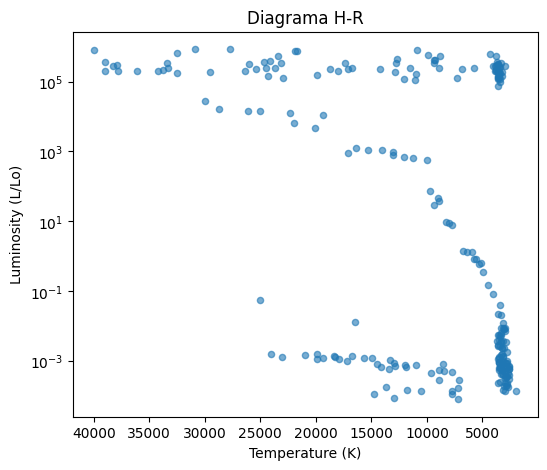

In [3]:
# Faz o Diagrama H-R

lx = 'Temperature (K)'
ly = 'Luminosity (L/Lo)'
plt.figure(figsize=(6,5))
plt.scatter(df[lx], df[ly], s=20, alpha=0.6)
plt.yscale('log')
plt.gca().invert_xaxis()
plt.xlabel(lx)
plt.ylabel(ly)
plt.title('Diagrama H-R')
plt.show()

In [4]:
# Determina quais features serão utilizados e o target para treinamento

FEATURES = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']
TARGET = 'Star category'

X = df[FEATURES].values
y_raw = df[TARGET].values

# Codifica os rótulos, já que o Target é uma variável de texto

le = LabelEncoder()
y = le.fit_transform(y_raw)
class_names = list(le.classes_)
print("Classes:", class_names)

# divisão do dataset em treino, teste e validação. 
# as variáveis abaixo determinam as frações

train_ratio = 0.50
test_ratio = 0.35
validation_ratio = 0.15

random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, stratify = y, random_state = random_state)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), stratify = y_test, random_state = random_state) 

print(f"train = {len(X_train)} \ntest = {len(X_test)} \nval = {len(X_val)}")

# Normaliza as variáveis usando o scaler padrão

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Classes: ['Brown Dwarf', 'Hypergiant', 'Main Sequence', 'Red Dwarf', 'Supergiant', 'White Dwarf']
train = 120 
test = 84 
val = 36


In [5]:
# Construção do modelo no Keras

model = keras.Sequential([
    layers.Input(shape=(len(FEATURES),)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

2025-08-29 09:57:36.718176: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,870 (19.02 KB)

 Trainable params: 4,870 (19.02 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.2250 - loss: 1.7400 - val_accuracy: 0.3056 - val_loss: 1.6869
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3333 - loss: 1.6422 - val_accuracy: 0.3889 - val_loss: 1.5939
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3750 - loss: 1.5498 - val_accuracy: 0.4167 - val_loss: 1.5106
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4833 - loss: 1.4724 - val_accuracy: 0.5556 - val_loss: 1.4335
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5583 - loss: 1.3994 - val_accuracy: 0.5833 - val_loss: 1.3635
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5500 - loss: 1.3326 - val_accuracy: 0.5278 - val_loss: 1.2991
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5417 - loss: 1.2725 - val_accuracy: 0.5833 - val_loss: 1.2391
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5500 - loss: 1.2159 - val_accuracy: 0.5833 - val_loss: 1.1834


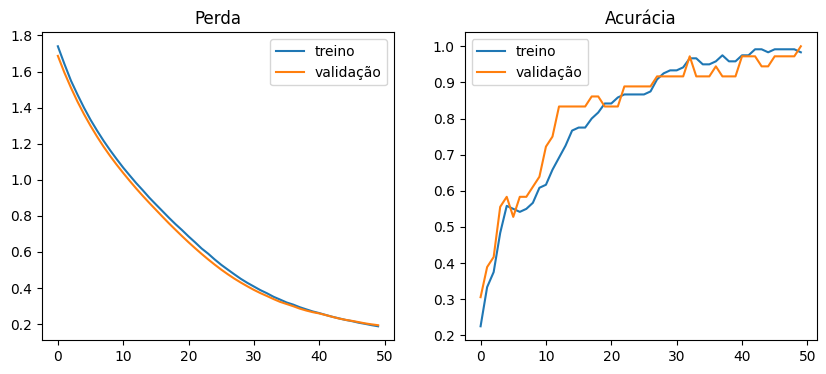

In [7]:
# faz figura da perda e da acurácia para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='treino')
plt.plot(history.history['val_accuracy'], label='validação')
plt.title('Acurácia')
plt.legend()
plt.show()

Test accuracy: 0.9881
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


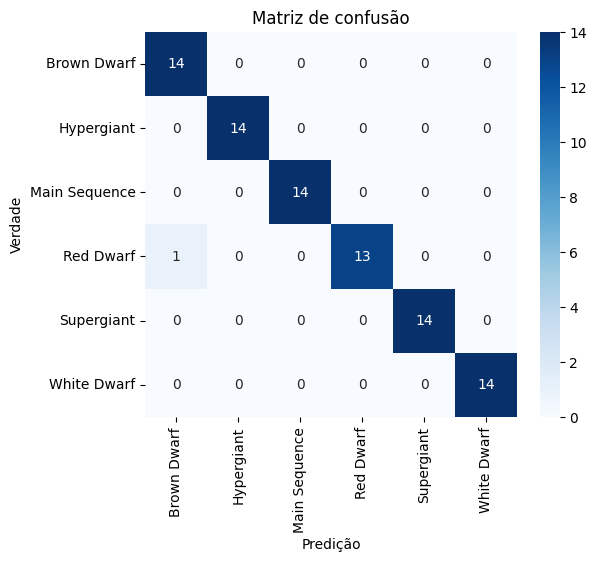

In [8]:
# Avaliar o dataset de teste
# obtém a matriz de confusão

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Verdade')
plt.title('Matriz de confusão')
plt.show()

In [9]:
# Fazer predições e printar o resultado

n = len(X_test)
samples = X_test[:n]
pred_labels = le.inverse_transform(np.argmax(model.predict(samples), axis=1))
true_labels = le.inverse_transform(y_test[:n])

for i in range(n):
    print(f"Pred: {pred_labels[i]}  \t Verd: {true_labels[i]}  \t {pred_labels[i] == true_labels[i]}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Pred: White Dwarf  	 Verd: White Dwarf  	 True
Pred: Red Dwarf  	 Verd: Red Dwarf  	 True
Pred: Hypergiant  	 Verd: Hypergiant  	 True
Pred: Hypergiant  	 Verd: Hypergiant  	 True
Pred: Red Dwarf  	 Verd: Red Dwarf  	 True
Pred: White Dwarf  	 Verd: White Dwarf  	 True
Pred: Red Dwarf  	 Verd: Red Dwarf  	 True
Pred: Hypergiant  	 Verd: Hypergiant  	 True
Pred: Supergiant  	 Verd: Supergiant  	 True
Pred: Supergiant  	 Verd: Supergiant  	 True
Pred: White Dwarf  	 Verd: White Dwarf  	 True
Pred: Brown Dwarf  	 Verd: Brown Dwarf  	 True
Pred: White Dwarf  	 Verd: White Dwarf  	 True
Pred: Brown Dwarf  	 Verd: Brown Dwarf  	 True
Pred: Brown Dwarf  	 Verd: Red Dwarf  	 False
Pred: Brown Dwarf  	 Verd: Brown Dwarf  	 True
Pred: Main Sequence  	 Verd: Main Sequence  	 True
Pred: White Dwarf  	 Verd: White Dwarf  	 True
Pred: Hypergiant  	 Verd: Hypergiant  	 True
Pred: Hypergiant  	 Verd: Hypergiant  	 True
Pred: White Dwarf  	 Verd: White Dwarf  	 Tru

In [10]:
# salva o modelo para uso futuro em novos dados. Dai não precisa treinar a rede novamente

model.save("star_classifier_keras.keras")
print("Modelo gravado como star_classifier_keras.keras")

Modelo gravado como star_classifier_keras.keras
